### **References**
- [https://viblo.asia/p/linear-regression-hoi-quy-tuyen-tinh-trong-machine-learning-4P856akRlY3](https://viblo.asia/p/linear-regression-hoi-quy-tuyen-tinh-trong-machine-learning-4P856akRlY3)
- [https://www.dathoangblog.com/2018/07/linear-regression-mot-bien.html](https://www.dathoangblog.com/2018/07/linear-regression-mot-bien.html)
- [https://www.wikihow.vn/T%C3%ADnh-%C4%90%E1%BB%99-l%E1%BB%87ch-Chu%E1%BA%A9n](https://www.wikihow.vn/T%C3%ADnh-%C4%90%E1%BB%99-l%E1%BB%87ch-Chu%E1%BA%A9n)
- [https://machinelearningcoban.com/2016/12/28/linearregression/](https://machinelearningcoban.com/2016/12/28/linearregression/)

### **Example**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m

test_data = pd.DataFrame({'x': [1,2,3,4,5,6,7,8,9,10], 'y': [2,1,3,6,9,11,13,15,17,20]})
print(test_data)

    x   y
0   1   2
1   2   1
2   3   3
3   4   6
4   5   9
5   6  11
6   7  13
7   8  15
8   9  17
9  10  20


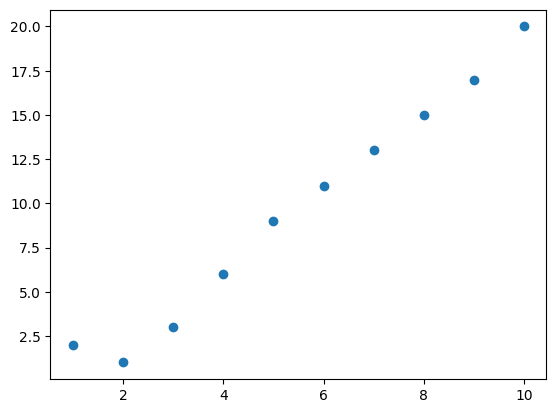

In [2]:
plt.scatter(test_data['x'], test_data['y'])
plt.show()

Linear Regression 1 parameter, linear equations: $$y=w_0+w_1x$$
- *w0: intercept*
- *w1: coefficient*

Multiple params: $$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

x, y is the input from test_data. Now need to find a, b to fit the dot chart on above, formula to calculate standard deviation: $$s=\sqrt{\frac{\sum\left(x_{i}-\overline{x}\right)^2}{n-1}}$$

In [3]:
n = len(test_data)
print('n:', n)

n: 10


In [4]:
x_mean = test_data['x'].mean()
print('x_mean:', x_mean)

x_mean: 5.5


In [5]:
y_mean = test_data['y'].mean()
print('y_mean:', y_mean)

y_mean: 9.7


Calculate standard deviation of x:

In [6]:
test_data["x_ps"] = test_data.apply(lambda row: (row['x'] - x_mean) ** 2, axis=1)
print(test_data)
x_variance = test_data['x_ps'].sum()/(n-1)
print('x_variance:', x_variance)

    x   y   x_ps
0   1   2  20.25
1   2   1  12.25
2   3   3   6.25
3   4   6   2.25
4   5   9   0.25
5   6  11   0.25
6   7  13   2.25
7   8  15   6.25
8   9  17  12.25
9  10  20  20.25
x_variance: 9.166666666666666


In [7]:
x_standard_deviation = m.sqrt(x_variance)
print(x_standard_deviation)

3.0276503540974917


Calculate standard deviation of y:

In [8]:
test_data["y_ps"] = test_data.apply(lambda row: (row['y'] - y_mean) ** 2, axis=1)
y_variance = test_data['y_ps'].sum()/(n-1)
y_standard_deviation = m.sqrt(y_variance)
print('y_standard_deviation:', y_standard_deviation)

y_standard_deviation: 6.61731734835869


Correlation coefficient formula: $$p_{xy}=\frac{Cov\left(x,y\right)}{\sigma_{x}\sigma_{y}}$$
Covariance formula: $$Cov_{xy}=\frac{\sum\left(x_{i}-\overline{x}\right)\left(y_{i}-\overline{y}\right)}{n-1}$$
Calculate correlation coefficient:

In [9]:
test_data["cov"] = test_data.apply(lambda row: (row['x'] - x_mean) * (row['y'] - y_mean), axis=1)
print(test_data)
cov = test_data['cov'].sum()/(n-1)
print('cov:', cov)

    x   y   x_ps    y_ps    cov
0   1   2  20.25   59.29  34.65
1   2   1  12.25   75.69  30.45
2   3   3   6.25   44.89  16.75
3   4   6   2.25   13.69   5.55
4   5   9   0.25    0.49   0.35
5   6  11   0.25    1.69   0.65
6   7  13   2.25   10.89   4.95
7   8  15   6.25   28.09  13.25
8   9  17  12.25   53.29  25.55
9  10  20  20.25  106.09  46.35
cov: 19.833333333333332


In [10]:
corr = cov/(x_standard_deviation*y_standard_deviation)
print(corr)

0.989938075756128


| | |
|--|--|
| x_standard_deviation | 3.0276503540974917 |
| y_standard_deviation | 6.61731734835869 |
| x_mean | 5.5 |
| y_mean | 9.7 |
| correlation_coefficient | 0.989938075756128 |


Calculate coefficient:

In [11]:
a = round(corr * (y_standard_deviation/x_standard_deviation), 3)
print('coefficient:', a)

coefficient: 2.164


Calculate intercept:

In [12]:
b = round(y_mean - a * x_mean, 3)
print('intercept', b)

intercept -2.202


=> Regression equations: $$y=2.164x-2.202$$

In [13]:
test_data['y_predict'] = test_data.apply(lambda row: a * row['x'] + b, axis=1)
print(test_data)

    x   y   x_ps    y_ps    cov  y_predict
0   1   2  20.25   59.29  34.65     -0.038
1   2   1  12.25   75.69  30.45      2.126
2   3   3   6.25   44.89  16.75      4.290
3   4   6   2.25   13.69   5.55      6.454
4   5   9   0.25    0.49   0.35      8.618
5   6  11   0.25    1.69   0.65     10.782
6   7  13   2.25   10.89   4.95     12.946
7   8  15   6.25   28.09  13.25     15.110
8   9  17  12.25   53.29  25.55     17.274
9  10  20  20.25  106.09  46.35     19.438


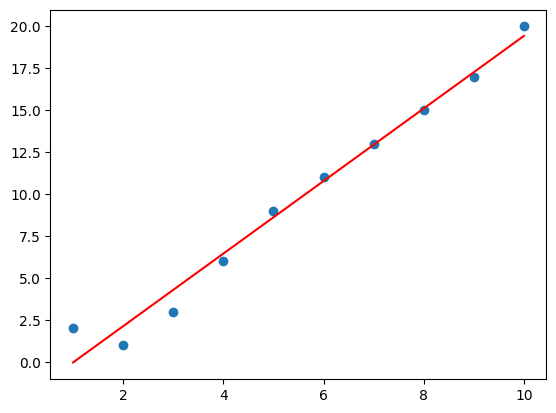

In [14]:
plt.scatter(test_data['x'], test_data['y'])
plt.plot(test_data['x'], test_data['y_predict'], color='red') # the fitting line
plt.show()

### **Evaluate model**

Mean Squared Error (MSE): $$MSE=\frac{1}{n}\cdot\sum^{}\left(y_{i}-y_{i}^{\prime}\right)^2$$
Calculate MSE:

In [15]:
test_data['y_mse'] = test_data.apply(lambda row: (row['y'] - row['y_predict']) ** 2, axis=1)
print(test_data)
mse = (1/n)*(test_data['y_mse'].sum())
print('mse:', mse)

    x   y   x_ps    y_ps    cov  y_predict     y_mse
0   1   2  20.25   59.29  34.65     -0.038  4.153444
1   2   1  12.25   75.69  30.45      2.126  1.267876
2   3   3   6.25   44.89  16.75      4.290  1.664100
3   4   6   2.25   13.69   5.55      6.454  0.206116
4   5   9   0.25    0.49   0.35      8.618  0.145924
5   6  11   0.25    1.69   0.65     10.782  0.047524
6   7  13   2.25   10.89   4.95     12.946  0.002916
7   8  15   6.25   28.09  13.25     15.110  0.012100
8   9  17  12.25   53.29  25.55     17.274  0.075076
9  10  20  20.25  106.09  46.35     19.438  0.315844
mse: 0.789092


Mean Absolute Error (MAE): $$MAE=\frac{\sum^{}\left|y_{i}^{\prime}-y_{i}\right|}{n}$$
Calculate MAE:

In [16]:
test_data['y_mae'] = test_data.apply(lambda row: abs(row['y_predict'] - row['y']), axis=1)
print(test_data)
mae = test_data['y_mae'].sum()/n
print('mae:', mae)

    x   y   x_ps    y_ps    cov  y_predict     y_mse  y_mae
0   1   2  20.25   59.29  34.65     -0.038  4.153444  2.038
1   2   1  12.25   75.69  30.45      2.126  1.267876  1.126
2   3   3   6.25   44.89  16.75      4.290  1.664100  1.290
3   4   6   2.25   13.69   5.55      6.454  0.206116  0.454
4   5   9   0.25    0.49   0.35      8.618  0.145924  0.382
5   6  11   0.25    1.69   0.65     10.782  0.047524  0.218
6   7  13   2.25   10.89   4.95     12.946  0.002916  0.054
7   8  15   6.25   28.09  13.25     15.110  0.012100  0.110
8   9  17  12.25   53.29  25.55     17.274  0.075076  0.274
9  10  20  20.25  106.09  46.35     19.438  0.315844  0.562
mae: 0.6507999999999997


Root Mean Square Error (RMSE): $$RMSE=\sqrt{\frac{\sum\left(y_{i}-y_{i}^{\prime}\right)^2}{n}}$$

In [17]:
test_data['y_rmse'] = test_data.apply(lambda row: (row['y'] - row['y_predict']) ** 2, axis=1)
print(test_data)
rmse = m.sqrt(test_data['y_rmse'].sum()/n)
print('rmse:', rmse)

    x   y   x_ps    y_ps    cov  y_predict     y_mse  y_mae    y_rmse
0   1   2  20.25   59.29  34.65     -0.038  4.153444  2.038  4.153444
1   2   1  12.25   75.69  30.45      2.126  1.267876  1.126  1.267876
2   3   3   6.25   44.89  16.75      4.290  1.664100  1.290  1.664100
3   4   6   2.25   13.69   5.55      6.454  0.206116  0.454  0.206116
4   5   9   0.25    0.49   0.35      8.618  0.145924  0.382  0.145924
5   6  11   0.25    1.69   0.65     10.782  0.047524  0.218  0.047524
6   7  13   2.25   10.89   4.95     12.946  0.002916  0.054  0.002916
7   8  15   6.25   28.09  13.25     15.110  0.012100  0.110  0.012100
8   9  17  12.25   53.29  25.55     17.274  0.075076  0.274  0.075076
9  10  20  20.25  106.09  46.35     19.438  0.315844  0.562  0.315844
rmse: 0.8883085049688536


In [18]:
from sklearn.metrics import root_mean_squared_error as sk_rmse, mean_squared_error as sk_mse, mean_absolute_error as sk_mae
print(sk_mse(test_data['y'], test_data['y_predict']))
print(sk_mae(test_data['y'], test_data['y_predict']))
print(sk_rmse(test_data['y'], test_data['y_predict']))

0.7890919999999999
0.6507999999999997
0.8883085049688536


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(test_data[['x']], test_data['y'], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
print('intercept_:', lr.intercept_)
print('coef_:', lr.coef_)

intercept_: -1.7413793103448292
coef_: [2.11206897]


In [21]:
test_data['y_predict_sklearn'] = test_data.apply(lambda row: lr.coef_[0] * row['x'] + lr.intercept_, axis=1)
print(test_data)

    x   y   x_ps    y_ps    cov  y_predict     y_mse  y_mae    y_rmse  \
0   1   2  20.25   59.29  34.65     -0.038  4.153444  2.038  4.153444   
1   2   1  12.25   75.69  30.45      2.126  1.267876  1.126  1.267876   
2   3   3   6.25   44.89  16.75      4.290  1.664100  1.290  1.664100   
3   4   6   2.25   13.69   5.55      6.454  0.206116  0.454  0.206116   
4   5   9   0.25    0.49   0.35      8.618  0.145924  0.382  0.145924   
5   6  11   0.25    1.69   0.65     10.782  0.047524  0.218  0.047524   
6   7  13   2.25   10.89   4.95     12.946  0.002916  0.054  0.002916   
7   8  15   6.25   28.09  13.25     15.110  0.012100  0.110  0.012100   
8   9  17  12.25   53.29  25.55     17.274  0.075076  0.274  0.075076   
9  10  20  20.25  106.09  46.35     19.438  0.315844  0.562  0.315844   

   y_predict_sklearn  
0           0.370690  
1           2.482759  
2           4.594828  
3           6.706897  
4           8.818966  
5          10.931034  
6          13.043103  
7          1

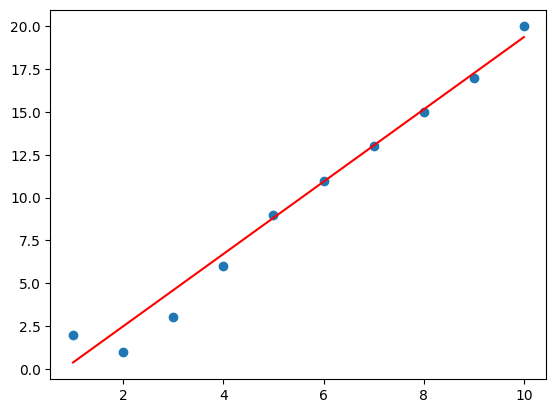

In [22]:
plt.scatter(test_data['x'], test_data['y'])
plt.plot(test_data['x'], test_data['y_predict_sklearn'], color='red') # the fitting line
plt.show()

In [23]:
y_pred = lr.predict(X_test)
compare_data = pd.DataFrame({ 'x': X_test['x'], 'y': y_test, 'y_predict': y_pred })
print(compare_data)

   x   y  y_predict
8  9  17  17.267241
1  2   1   2.482759


In [24]:
accuracy = lr.score(X_test, y_test)
print('accuracy:', accuracy)

accuracy: 0.982265694671522


### **Using matrices**

In [25]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# height (cm)
height = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
weight = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

# test
height_test = np.array([[155, 160]])
weight_test = np.array([[52, 56]])

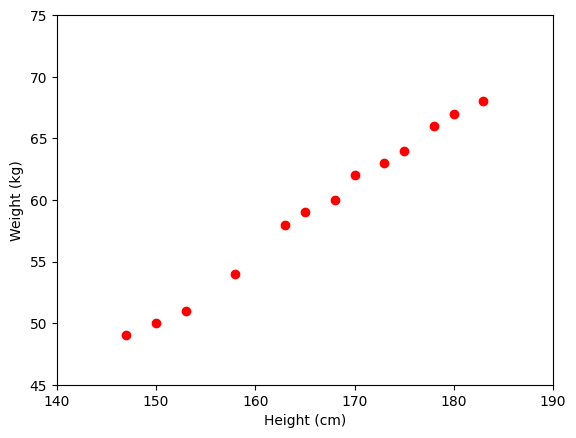

In [27]:
# Visualize data 
plt.plot(height, weight, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [28]:
# Building xBar 
one = np.ones((height.shape[0], 1))
xBar = np.concatenate((one, height), axis = 1)
print(xBar)

[[  1. 147.]
 [  1. 150.]
 [  1. 153.]
 [  1. 158.]
 [  1. 163.]
 [  1. 165.]
 [  1. 168.]
 [  1. 170.]
 [  1. 173.]
 [  1. 175.]
 [  1. 178.]
 [  1. 180.]
 [  1. 183.]]


In [29]:
print(xBar.T)
print(weight)

[[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [147. 150. 153. 158. 163. 165. 168. 170. 173. 175. 178. 180. 183.]]
[[49]
 [50]
 [51]
 [54]
 [58]
 [59]
 [60]
 [62]
 [63]
 [64]
 [66]
 [67]
 [68]]


In [30]:
# Calculating weights of the fitting line 
A = np.dot(xBar.T, xBar)
b = np.dot(xBar.T, weight)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [[-33.73541021]
 [  0.55920496]]


In [31]:
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

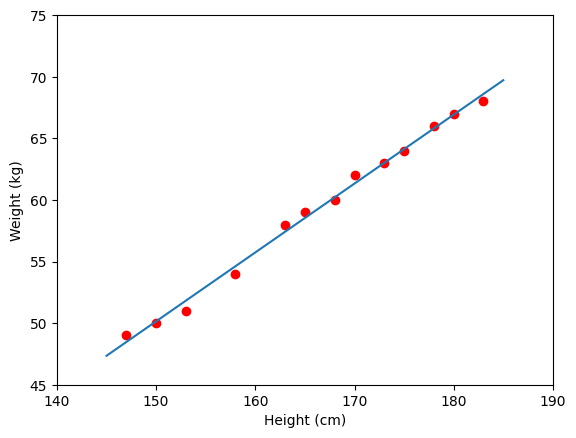

In [32]:
# Drawing the fitting line 
plt.plot(height.T, weight.T, 'ro')     # data 
plt.plot(x0, y0) # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [33]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


### **Sklearn library**

In [34]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(xBar, weight)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]


### **Test manual loop to find fitting line**

In [35]:
import pandas as pd
data = pd.read_csv('./dataset/height_weight.csv')
data = data.iloc[0:4]
print(data)

   height  weight
0   147.0    49.0
1   150.0    50.0
2   153.0    51.0
3   155.0    52.0


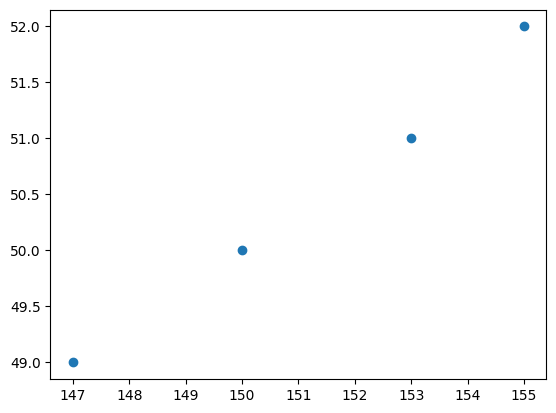

In [36]:
plt.scatter(data.height, data. weight)
plt.show()

### $$y=mx+b$$
Set m = 0, b = 0

In [37]:
m = 0
# m = 0.25
b = 0
# b = 12
data["predicted_weight"] = data.apply(lambda row: row['height'] * m + b, axis=1)
data["loss"] = data.apply(lambda row: (row['weight'] - row['predicted_weight']) ** 2, axis=1)
loss = data['loss'].sum()
print(data)
print(loss)

   height  weight  predicted_weight    loss
0   147.0    49.0               0.0  2401.0
1   150.0    50.0               0.0  2500.0
2   153.0    51.0               0.0  2601.0
3   155.0    52.0               0.0  2704.0
10206.0


In [38]:
# Calculate m, b
linear_data = pd.DataFrame({'m': [], 'b': [], 'loss': []})
for j in range(10):
    m += 0.25
    b = 0
    data["predicted_weight"] = data.apply(lambda row: row['height'] * m + b, axis=1)
    data["loss"] = data.apply(lambda row: (row['weight'] - row['predicted_weight']) ** 2, axis=1)
    loss = data['loss'].sum()
    for i in range(100):
        b += 1
        data["predicted_weight"] = data.apply(lambda row: row['height'] * m + b, axis=1)
        data["loss"] = data.apply(lambda row: (row['weight'] - row['predicted_weight']) ** 2, axis=1)
        loss_temp = data['loss'].sum()
        print(loss_temp, loss)
        if (loss_temp < loss):
            loss = loss_temp
        else:
            linear_data.loc[len(linear_data.index)] = [m, b, loss]
            break

546.9375 644.4375
457.4375 546.9375
375.9375 457.4375
302.4375 375.9375
236.9375 302.4375
179.4375 236.9375
129.9375 179.4375
88.4375 129.9375
54.9375 88.4375
29.4375 54.9375
11.9375 29.4375
2.4375 11.9375
0.9375 2.4375
7.4375 0.9375
2730.75 2525.75
16357.4375 15849.9375
41427.0 40617.0
77939.4375 76826.9375
125894.75 124479.75
185292.9375 183575.4375
256134.0 254114.0
338417.9375 336095.4375
432144.75 429519.75


In [39]:
print(linear_data)

      m     b         loss
0  0.25  14.0       0.9375
1  0.50   1.0    2525.7500
2  0.75   1.0   15849.9375
3  1.00   1.0   40617.0000
4  1.25   1.0   76826.9375
5  1.50   1.0  124479.7500
6  1.75   1.0  183575.4375
7  2.00   1.0  254114.0000
8  2.25   1.0  336095.4375
9  2.50   1.0  429519.7500


=> b = 14
=> m = 0.25

In [40]:
b = 14
m = 0.25
data["predicted_weight"] = data.apply(lambda row: row['height'] * m + b, axis=1)
data["loss"] = data.apply(lambda row: (row['weight'] - row['predicted_weight']) ** 2, axis=1)
print(data)

   height  weight  predicted_weight    loss
0   147.0    49.0             50.75  3.0625
1   150.0    50.0             51.50  2.2500
2   153.0    51.0             52.25  1.5625
3   155.0    52.0             52.75  0.5625


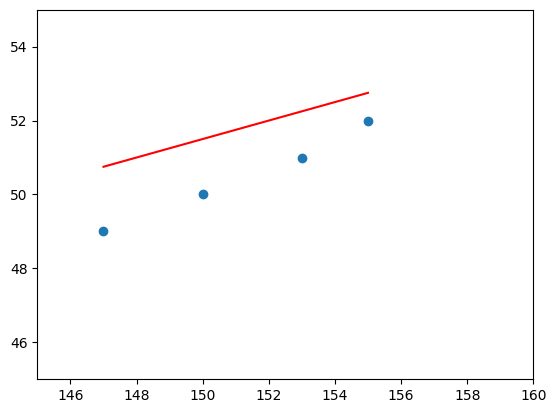

In [41]:
plt.scatter(data.height, data.weight)
plt.plot(data['height'], data['predicted_weight'], color='red') # the fitting line
plt.axis([145, 160, 45, 55])
plt.show()